카테고리형변수 라벨 인코딩 + Q_E, Q_A 변수 40개 제거 후, 
adaboost 모델의 n_estimators=50, learning_rate=0.97, max_depth=5일 때 test 데이터에 대한 정확도가 가장 높았다.
(train ridge score : 0.759
test ridge score : 0.668
confusion_matrix : [[3058 1529]
 [1249 2531]]
recall : 0.6695767195767196
precision : 0.6233990147783252
accuracy : 0.6679813553244891)

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.2 MB/s 


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RepeatedKFold
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score
import category_encoders as ce
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = pd.read_excel('train_preprocessing.xlsx')

In [ ]:
ohe = OneHotEncoder(sparse=False)
train['voted'] = ohe.fit_transform(train[['voted']])
train['voted'] = train['voted'].astype(int)
train['voted']

0        0
1        0
2        1
3        1
4        1
        ..
41828    0
41829    0
41830    1
41831    1
41832    1
Name: voted, Length: 41833, dtype: int64

In [ ]:
y=train['voted']
X=train.drop(['Unnamed: 0', 'voted'], axis=1)

In [ ]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
   X, y, random_state=42, test_size=0.2
)

# Label Encoding

In [ ]:
label = LabelEncoder()
x_train['gender_code'] = label.fit_transform(x_train['gender'])
x_train['age_group_code'] = label.fit_transform(x_train['age_group'])
x_train['race_code'] = label.fit_transform(x_train['race'])
x_train['religion_code'] = label.fit_transform(x_train['religion'])

x_test['gender_code'] = label.fit_transform(x_test['gender'])
x_test['age_group_code'] = label.fit_transform(x_test['age_group'])
x_test['race_code'] = label.fit_transform(x_test['race'])
x_test['religion_code'] = label.fit_transform(x_test['religion'])

drop2 = ['gender','age_group','race','religion']
x_train = x_train.drop(drop2, axis = 1)
x_test = x_test.drop(drop2, axis = 1)

## n_estimators=250, learning_rate=1.01일 때 1, 0.651

In [ ]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {'n_estimators':[10,50,250,1000]}

clf = GridSearchCV(abc, parameters, cv=5, scoring='f1', n_jobs=-1)
results = clf.fit(x_train,y_train)
print('Config: %s' % results.best_params_)

Config: {'n_estimators': 10}


In [ ]:
parameters = {
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)]
}
clf = GridSearchCV(abc, parameters, cv=5, scoring='f1', n_jobs=-1)
results = clf.fit(x_train,y_train)
print('Config: %s' % results.best_params_)


Config: {'learning_rate': 1.04}


In [ ]:
parameters = {
    'n_estimators':[10,50,250,1000],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)]
}
clf = GridSearchCV(abc, parameters, cv=5, scoring='f1', n_jobs=-1)
results = clf.fit(x_train,y_train)
print('Config: %s' % results.best_params_)

Config: {'learning_rate': 1.01, 'n_estimators': 250}


In [ ]:
# Decision Tree 기반의 AdaBoost
tree_model = DecisionTreeClassifier()
model = AdaBoostClassifier(base_estimator = tree_model, n_estimators=10, random_state=0, learning_rate=1.04)
model.fit(x_train, y_train) 
y_pred = model.predict(x_test)

print('train ridge score : {:.3f}'.format(model.score(x_train, y_train)))
print('test ridge score : {:.3f}'.format(model.score(x_test, y_test)))
print('confusion_matrix : {}'.format(confusion_matrix(y_test, y_pred)))
print('recall : {}'.format(recall_score(y_test, y_pred)))
print('precision : {}'.format(precision_score(y_test, y_pred)))
print('accuracy : {}'.format(accuracy_score(y_test, y_pred)))

train ridge score : 1.000
test ridge score : 0.615
confusion_matrix : [[2934 1653]
 [1571 2209]]
recall : 0.5843915343915344
precision : 0.571983428275505
accuracy : 0.6146767061073264


In [ ]:
# Decision Tree 기반의 AdaBoost
tree_model = DecisionTreeClassifier()
model = AdaBoostClassifier(base_estimator = tree_model, n_estimators=250, random_state=0, learning_rate=1.01)
model.fit(x_train, y_train) 
y_pred = model.predict(x_test)

print('train ridge score : {:.3f}'.format(model.score(x_train, y_train)))
print('test ridge score : {:.3f}'.format(model.score(x_test, y_test)))
print('confusion_matrix : {}'.format(confusion_matrix(y_test, y_pred)))
print('recall : {}'.format(recall_score(y_test, y_pred)))
print('precision : {}'.format(precision_score(y_test, y_pred)))
print('accuracy : {}'.format(accuracy_score(y_test, y_pred)))

train ridge score : 1.000
test ridge score : 0.615
confusion_matrix : [[2934 1653]
 [1571 2209]]
recall : 0.5843915343915344
precision : 0.571983428275505
accuracy : 0.6146767061073264


## Q_E, Q_A 제외한 후

In [ ]:
X=X.drop(X.columns[0:40],axis=1)

In [ ]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
   X, y, random_state=42, test_size=0.2
)

In [ ]:
label = LabelEncoder()
x_train['gender_code'] = label.fit_transform(x_train['gender'])
x_train['age_group_code'] = label.fit_transform(x_train['age_group'])
x_train['race_code'] = label.fit_transform(x_train['race'])
x_train['religion_code'] = label.fit_transform(x_train['religion'])

x_test['gender_code'] = label.fit_transform(x_test['gender'])
x_test['age_group_code'] = label.fit_transform(x_test['age_group'])
x_test['race_code'] = label.fit_transform(x_test['race'])
x_test['religion_code'] = label.fit_transform(x_test['religion'])

drop2 = ['gender','age_group','race','religion']
x_train = x_train.drop(drop2, axis = 1)
x_test = x_test.drop(drop2, axis = 1)

## n_estimators=50, learning_rate=0.97일 때 1, 0.614

In [ ]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {'n_estimators':[10,50,250,1000]}

clf = GridSearchCV(abc, parameters, cv=5, scoring='f1', n_jobs=-1)
results = clf.fit(x_train,y_train)
print('Config: %s' % results.best_params_)

Config: {'n_estimators': 250}


In [ ]:
parameters = {
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)]
}
clf = GridSearchCV(abc, parameters, cv=5, scoring='f1', n_jobs=-1)
results = clf.fit(x_train,y_train)
print('Config: %s' % results.best_params_)

Config: {'learning_rate': 1.04}


In [ ]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {
    'n_estimators':[10,50,250,1000],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)]
}
clf = GridSearchCV(abc, parameters, cv=5, scoring='f1', n_jobs=-1)
results = clf.fit(x_train,y_train)
print('Config: %s' % results.best_params_)

Config: {'learning_rate': 0.97, 'n_estimators': 50}


In [ ]:
# Decision Tree 기반의 AdaBoost
tree_model = DecisionTreeClassifier()
model = AdaBoostClassifier(base_estimator = tree_model, n_estimators=250, random_state=0, learning_rate=1.04)
model.fit(x_train, y_train) 
y_pred = model.predict(x_test)

print('train ridge score : {:.3f}'.format(model.score(x_train, y_train)))
print('test ridge score : {:.3f}'.format(model.score(x_test, y_test)))
print('confusion_matrix : {}'.format(confusion_matrix(y_test, y_pred)))
print('recall : {}'.format(recall_score(y_test, y_pred)))
print('precision : {}'.format(precision_score(y_test, y_pred)))
print('accuracy : {}'.format(accuracy_score(y_test, y_pred)))

train ridge score : 1.000
test ridge score : 0.614
confusion_matrix : [[2954 1633]
 [1593 2187]]
recall : 0.5785714285714286
precision : 0.5725130890052356
accuracy : 0.6144376718059041


In [ ]:
# Decision Tree 기반의 AdaBoost
tree_model = DecisionTreeClassifier()
model = AdaBoostClassifier(base_estimator = tree_model, n_estimators=50, random_state=0, learning_rate=0.97)
model.fit(x_train, y_train) 
y_pred = model.predict(x_test)

print('train ridge score : {:.3f}'.format(model.score(x_train, y_train)))
print('test ridge score : {:.3f}'.format(model.score(x_test, y_test)))
print('confusion_matrix : {}'.format(confusion_matrix(y_test, y_pred)))
print('recall : {}'.format(recall_score(y_test, y_pred)))
print('precision : {}'.format(precision_score(y_test, y_pred)))
print('accuracy : {}'.format(accuracy_score(y_test, y_pred)))

train ridge score : 1.000
test ridge score : 0.614
confusion_matrix : [[2954 1633]
 [1593 2187]]
recall : 0.5785714285714286
precision : 0.5725130890052356
accuracy : 0.6144376718059041


In [ ]:
fi = pd.DataFrame({
    'feature' : x_train.columns,
    'feature importance' : model.feature_importances_
})
fi['feature importance'] = fi['feature importance'] * 100
fi = fi.sort_values('feature importance') # age_group, QtE, QiE, QsE, QdE, education, QfE, QgE, QbE, QkE
fi

,feature,feature importance
26,wr_08,0.154217
30,wr_12,0.256955
25,wr_07,0.329722
28,wr_10,0.332098
31,wr_13,0.424689
23,wr_05,0.474835
20,wr_02,0.493558
16,wf_01,0.595400
22,wr_04,0.726161
18,wf_03,0.743201


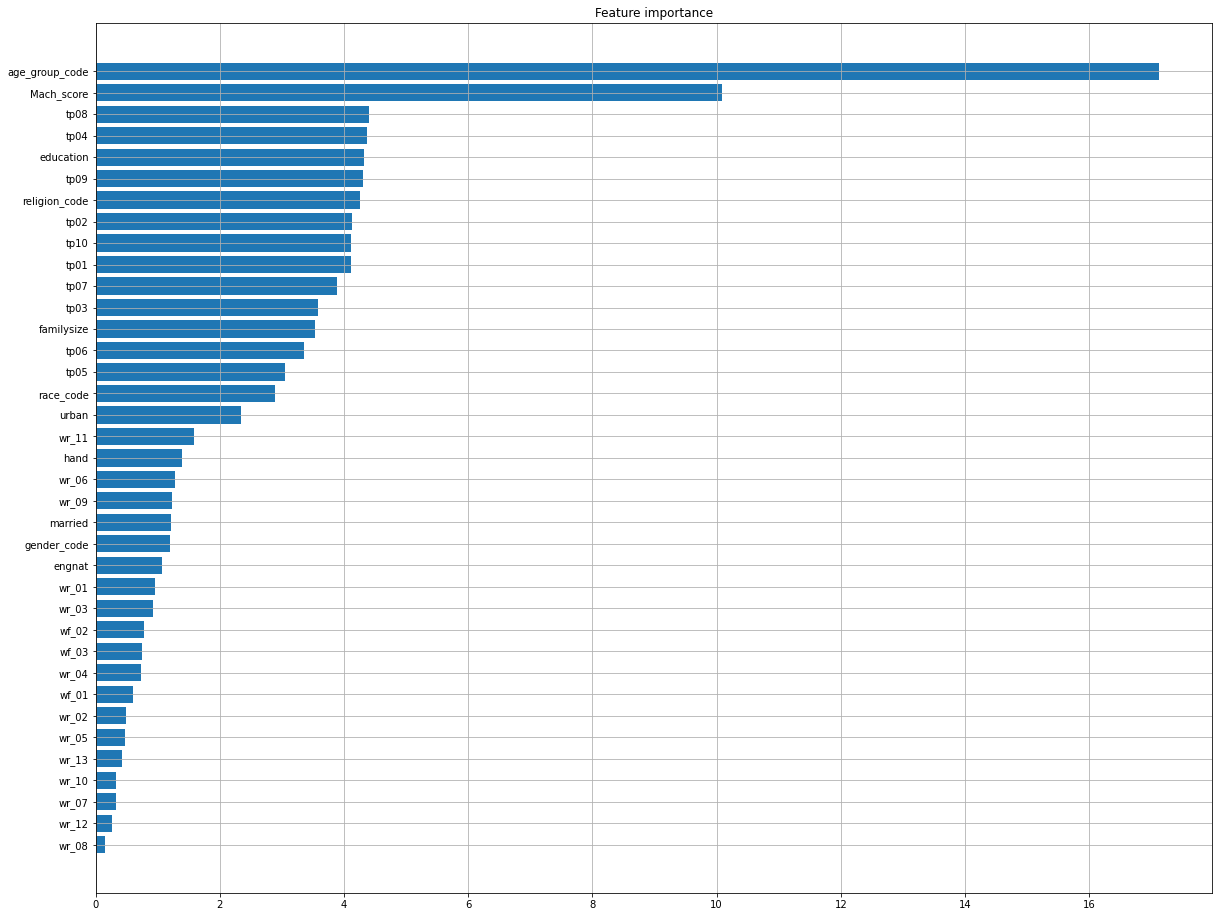

In [ ]:
plt.figure(figsize=(20,16))
plt.barh(fi['feature'], fi['feature importance'])
plt.title('Feature importance')
ax = plt.gca()
ax.xaxis.grid(True)
ax.yaxis.grid(True)
plt.show()

## depth 변경

In [ ]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5))
parameters = {'n_estimators':[10,50,250,1000],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)]}

clf = GridSearchCV(abc, parameters, cv=5, scoring='f1', n_jobs=-1)
results = clf.fit(x_train,y_train)
print('Config: %s' % results.best_params_)

Config: {'learning_rate': 1.04, 'n_estimators': 10}


In [ ]:
# Decision Tree 기반의 AdaBoost
tree_model = DecisionTreeClassifier(max_depth=5)
model = AdaBoostClassifier(base_estimator = tree_model, n_estimators=10, random_state=0, learning_rate=1.04)
model.fit(x_train, y_train) 
y_pred = model.predict(x_test)

print('train ridge score : {:.3f}'.format(model.score(x_train, y_train)))
print('test ridge score : {:.3f}'.format(model.score(x_test, y_test)))
print('confusion_matrix : {}'.format(confusion_matrix(y_test, y_pred)))
print('recall : {}'.format(recall_score(y_test, y_pred)))
print('precision : {}'.format(precision_score(y_test, y_pred)))
print('accuracy : {}'.format(accuracy_score(y_test, y_pred)))

train ridge score : 0.715
test ridge score : 0.684
confusion_matrix : [[2938 1649]
 [ 998 2782]]
recall : 0.735978835978836
precision : 0.627849243962988
accuracy : 0.6836381020676467


In [ ]:
# Decision Tree 기반의 AdaBoost
tree_model = DecisionTreeClassifier(max_depth=5)
model = AdaBoostClassifier(base_estimator = tree_model, n_estimators=50, random_state=0, learning_rate=0.97)
model.fit(x_train, y_train) 
y_pred = model.predict(x_test)

print('train ridge score : {:.3f}'.format(model.score(x_train, y_train)))
print('test ridge score : {:.3f}'.format(model.score(x_test, y_test)))
print('confusion_matrix : {}'.format(confusion_matrix(y_test, y_pred)))
print('recall : {}'.format(recall_score(y_test, y_pred)))
print('precision : {}'.format(precision_score(y_test, y_pred)))
print('accuracy : {}'.format(accuracy_score(y_test, y_pred)))

train ridge score : 0.759
test ridge score : 0.668
confusion_matrix : [[3058 1529]
 [1249 2531]]
recall : 0.6695767195767196
precision : 0.6233990147783252
accuracy : 0.6679813553244891


In [ ]:
fi = pd.DataFrame({
    'feature' : x_train.columns,
    'feature importance' : model.feature_importances_
})
fi['feature importance'] = fi['feature importance'] * 100
fi = fi.sort_values('feature importance') # age_group, QtE, QiE, QsE, QdE, education, QfE, QgE, QbE, QkE
fi

,feature,feature importance
26,wr_08,0.248335
25,wr_07,0.308851
28,wr_10,0.310992
23,wr_05,0.461056
21,wr_03,0.539631
27,wr_09,0.589757
30,wr_12,0.720363
29,wr_11,0.776909
22,wr_04,0.797445
24,wr_06,0.829977


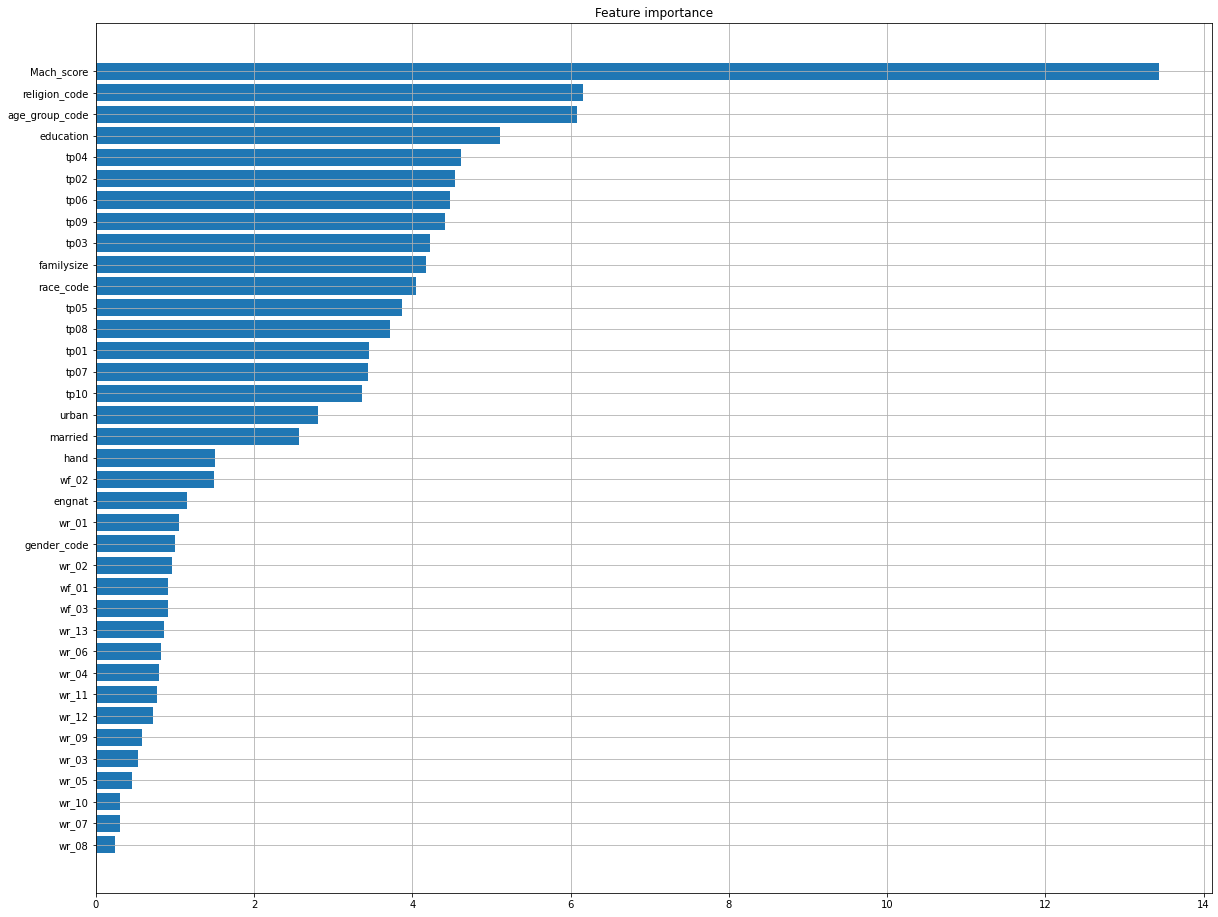

In [ ]:
plt.figure(figsize=(20,16))
plt.barh(fi['feature'], fi['feature importance'])
plt.title('Feature importance')
ax = plt.gca()
ax.xaxis.grid(True)
ax.yaxis.grid(True)
plt.show()

# Target Encoding

In [ ]:
def target_encoder(data, col) :
  encoder = ce.target_encoder.TargetEncoder(cols=[col])
  encoder.fit(data[col], data['voted']);
  data[col + '_code'] = encoder.transform(data[col])
  data[col + '_code'] = data[col + '_code'].round()
  data = data.drop([col], axis = 1)
  return data

train = target_encoder(train, 'gender')
train = target_encoder(train, 'age_group')
train = target_encoder(train, 'race')
train = target_encoder(train, 'religion')

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [ ]:
y=train['voted']
X=train.drop(['Unnamed: 0', 'voted'], axis=1)

In [ ]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
   X, y, random_state=42, test_size=0.2
)

## n_estimators=1000, learning_rate=1.04일 때 1, 0.611

In [ ]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {'n_estimators':[10,50,250,1000]}

clf = GridSearchCV(abc, parameters, cv=5, scoring='f1', n_jobs=-1)
results = clf.fit(x_train,y_train)
print('Config: %s' % results.best_params_)

Config: {'n_estimators': 10}


In [ ]:
parameters = {
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)]
}
clf = GridSearchCV(abc, parameters, cv=5, scoring='f1', n_jobs=-1)
results = clf.fit(x_train,y_train)
print('Config: %s' % results.best_params_)

Config: {'learning_rate': 1.04}


In [ ]:
parameters = {
    'n_estimators':[10,50,250,1000],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)]
}
clf = GridSearchCV(abc, parameters, cv=5, scoring='f1', n_jobs=-1)
results = clf.fit(x_train,y_train)
print('Config: %s' % results.best_params_)

Config: {'learning_rate': 1.04, 'n_estimators': 1000}


In [ ]:
# Decision Tree 기반의 AdaBoost
tree_model = DecisionTreeClassifier()
model = AdaBoostClassifier(base_estimator = tree_model, n_estimators=10, random_state=0, learning_rate=1.04)
model.fit(x_train, y_train) 
y_pred = model.predict(x_test)

print('train ridge score : {:.3f}'.format(model.score(x_train, y_train)))
print('test ridge score : {:.3f}'.format(model.score(x_test, y_test)))
print('confusion_matrix : {}'.format(confusion_matrix(y_test, y_pred)))
print('recall : {}'.format(recall_score(y_test, y_pred)))
print('precision : {}'.format(precision_score(y_test, y_pred)))
print('accuracy : {}'.format(accuracy_score(y_test, y_pred)))

train ridge score : 1.000
test ridge score : 0.611
confusion_matrix : [[2966 1621]
 [1632 2148]]
recall : 0.5682539682539682
precision : 0.5699124436189971
accuracy : 0.6112107087367037


In [ ]:
# Decision Tree 기반의 AdaBoost
tree_model = DecisionTreeClassifier()
model = AdaBoostClassifier(base_estimator = tree_model, n_estimators=1000, random_state=0, learning_rate=1.04)
model.fit(x_train, y_train) 
y_pred = model.predict(x_test)

print('train ridge score : {:.3f}'.format(model.score(x_train, y_train)))
print('test ridge score : {:.3f}'.format(model.score(x_test, y_test)))
print('confusion_matrix : {}'.format(confusion_matrix(y_test, y_pred)))
print('recall : {}'.format(recall_score(y_test, y_pred)))
print('precision : {}'.format(precision_score(y_test, y_pred)))
print('accuracy : {}'.format(accuracy_score(y_test, y_pred)))

train ridge score : 1.000
test ridge score : 0.611
confusion_matrix : [[2966 1621]
 [1632 2148]]
recall : 0.5682539682539682
precision : 0.5699124436189971
accuracy : 0.6112107087367037


## Q_E, Q_A 제외한 후

In [ ]:
x_train=x_train.drop(x_train.columns[0:40],axis=1)
x_test=x_test.drop(x_test.columns[0:40],axis=1)

## n_estimators=n_estimators=50, learning_rate=1.04일 때 1.000, 0.609

In [ ]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {'n_estimators':[10,50,250,1000]}

clf = GridSearchCV(abc, parameters, cv=5, scoring='f1', n_jobs=-1)
results = clf.fit(x_train,y_train)
print('Config: %s' % results.best_params_)

Config: {'n_estimators': 1000}


In [ ]:
parameters = {
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)]
}
clf = GridSearchCV(abc, parameters, cv=5, scoring='f1', n_jobs=-1)
results = clf.fit(x_train,y_train)
print('Config: %s' % results.best_params_)

Config: {'learning_rate': 1.02}


In [ ]:
parameters = {
    'n_estimators':[10,50,250,1000],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)]
}
clf = GridSearchCV(abc, parameters, cv=5, scoring='f1', n_jobs=-1)
results = clf.fit(x_train,y_train)
print('Config: %s' % results.best_params_)

Config: {'learning_rate': 1.04, 'n_estimators': 50}


In [ ]:
# Decision Tree 기반의 AdaBoost
tree_model = DecisionTreeClassifier()
model = AdaBoostClassifier(base_estimator = tree_model, n_estimators=1000, random_state=0, learning_rate=1.02)
model.fit(x_train, y_train) 
y_pred = model.predict(x_test)

print('train ridge score : {:.3f}'.format(model.score(x_train, y_train)))
print('test ridge score : {:.3f}'.format(model.score(x_test, y_test)))
print('confusion_matrix : {}'.format(confusion_matrix(y_test, y_pred)))
print('recall : {}'.format(recall_score(y_test, y_pred)))
print('precision : {}'.format(precision_score(y_test, y_pred)))
print('accuracy : {}'.format(accuracy_score(y_test, y_pred)))

train ridge score : 1.000
test ridge score : 0.609
confusion_matrix : [[2940 1647]
 [1622 2158]]
recall : 0.5708994708994709
precision : 0.5671484888304862
accuracy : 0.6092984343253257


In [ ]:
# Decision Tree 기반의 AdaBoost
tree_model = DecisionTreeClassifier()
model = AdaBoostClassifier(base_estimator = tree_model, n_estimators=50, random_state=0, learning_rate=1.04)
model.fit(x_train, y_train) 
y_pred = model.predict(x_test) 

print('train ridge score : {:.3f}'.format(model.score(x_train, y_train)))
print('test ridge score : {:.3f}'.format(model.score(x_test, y_test)))
print('confusion_matrix : {}'.format(confusion_matrix(y_test, y_pred)))
print('recall : {}'.format(recall_score(y_test, y_pred)))
print('precision : {}'.format(precision_score(y_test, y_pred)))
print('accuracy : {}'.format(accuracy_score(y_test, y_pred)))

train ridge score : 1.000
test ridge score : 0.609
confusion_matrix : [[2940 1647]
 [1622 2158]]
recall : 0.5708994708994709
precision : 0.5671484888304862
accuracy : 0.6092984343253257
